In [11]:
import tensorflow as tf
import numpy as np
import keras

In [12]:
from keras import layers

In [13]:
mnist = tf.keras.datasets.fashion_mnist

In [14]:
from keras.utils import to_categorical


In [15]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
train_Y_one_hot = to_categorical(training_labels)
test_Y_one_hot = to_categorical(test_labels)
training_images=training_images / 255.0
test_images=test_images / 255.0

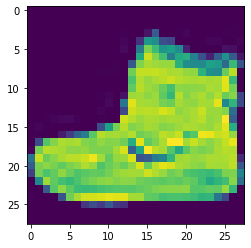

In [16]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])


In [17]:
#changing the image shape to fit in neural network
training_images = training_images.reshape((len(training_images), np.prod(training_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
training_images.shape, test_images.shape




((60000, 784), (10000, 784))

In [18]:
#Checking images for normalization
np.max(training_images), np.max(test_images)

(1.0, 1.0)

In [26]:
batch_size = 64
encoding_dim=32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [38]:
autoencoder.fit(training_images,training_images,
                epochs=50,
                batch_size=64,validation_data=(test_images,test_images))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.3485 - val_loss: 0.3083
Epoch 2/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.2970 - val_loss: 0.2932
Epoch 3/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.2888 - val_loss: 0.2891
Epoch 4/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.2860 - val_loss: 0.2876
Epoch 5/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.2847 - val_loss: 0.2864
Epoch 6/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.2839 - val_loss: 0.2860
Epoch 7/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.2834 - val_loss: 0.2855
Epoch 8/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.2830 - val_loss: 0.2851
Epoch 9/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.2828 - val_loss: 0.2848
Epoch

In [39]:
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)


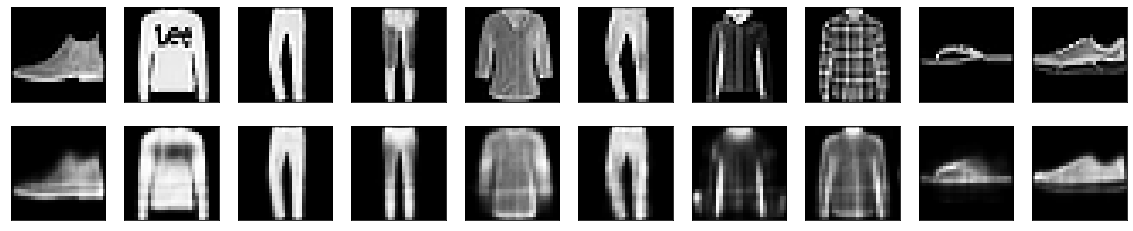

In [40]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
def encoder(input_img):
    conv1 = Conv2D(32, (3, 3), activation='relu')(input_img)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (3, 3), activation='relu')(conv3)
    conv3 = BatchNormalization()(conv3)
    return conv4

In [29]:
def decoder(conv3):  
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv4 = BatchNormalization()(conv4)
    up1 = UpSampling2D((2,2))(conv4) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)
    return decoded

In [30]:
from tensorflow.keras.models import Model


In [31]:
autoencoder = Model(training_images, decoder(encoder()))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

NameError: name 'input_img' is not defined

In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))
